## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
#label mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

categories = len(cat_to_name.values())
print(categories)

102


In [4]:
# Imports here

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from collections import OrderedDict
from PIL import Image

In [5]:
#loading data
data_dir = '/content/flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [6]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms_training = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


data_transforms_testing_validation = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])



# TODO: Load the datasets with ImageFolder
#image_datasets =
train_data = datasets.ImageFolder(train_dir, transform=data_transforms_training)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms_testing_validation)
test_data = datasets.ImageFolder(test_dir, transform=data_transforms_testing_validation)


# TODO: Using the image datasets and the trainforms, define the dataloaders
#dataloaders =
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
# TODO: Build and train your network

In [8]:
#variables to be taken as argparse for part 2
architecture = "vgg16"      #densenet121 #alexnet
lr = 0.001
hidden_layer = 1024
device = "cuda"
epochs = 5
dropout =0.4

In [9]:
def Network(arch='resnet50' , dropout=0.4 , hidden_layer=1024):

  #choosing model from small to big size
  if arch == 'densenet121':
    model = models.densenet121(pretrained = True)
    input_nodes = 1024
  elif arch == 'resnet50':
    model = models.resnet50(pretrained = True)
    input_nodes = 2048
  elif arch == 'alexnet':
    model = models.alexnet(pretrained = True)
    input_nodes = 9216
  elif arch =='vgg16':
    model = models.vgg16(pretrained = True)
    input_nodes = 25088


  # Turn off gradients for our model
  for param in model.parameters():
    param.require_grad = False

  #defining classifier
  classifier = nn.Sequential(OrderedDict([
        ('dropout', nn.Dropout(dropout)),
        ('fc1', nn.Linear(input_nodes, hidden_layer)),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(hidden_layer, 256)),
        ('output', nn.Linear(256, 102)),
        ('softmax', nn.LogSoftmax(dim = 1))
    ]))
  #adding the layers to model
  if (arch=='resnet50'):
    model.fc=classifier
  else:
    model.classifier=classifier

  return model


#creating model
model = Network(arch=architecture)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 64.7MB/s]


In [10]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
#loss criterion
criterion = nn.NLLLoss()
#optimizer
if (architecture=='resnet50'):
  optimizer = optim.Adam(model.fc.parameters(), lr=lr)
else:
  optimizer = optim.Adam(model.classifier.parameters(), lr=lr)


In [12]:
# function to train the model
def train(model=model, trainloader=trainloader, optimizer= optimizer , criterion=criterion, epochs= epochs , device=device):
  steps =0
  print_every = 60

  #moving model to gpu
  if(device=="cuda"):
    model.to(device)

  #training phase
  for epoch in range(epochs):
    running_loss=0
    for images , labels in trainloader:
      #Training Loop
      #counting batches passed
      steps+= 1
      # moving inputs to device
      images , labels = images.to(device) , labels.to(device)

      # removing gradients
      optimizer.zero_grad()
      # feeding into model
      logps=model(images)
      #calculating loss
      loss = criterion(logps, labels)
      #backpropagation
      loss.backward()
      #optimizing the weights
      optimizer.step()
      #calculating total loss of training data
      running_loss +=loss.item()


      if steps % print_every == 0:

        #evalluation loop
        #turning on eval mode
        model.eval()
        valid_loss = 0
        accuracy = 0

        for v_images , v_labels in validloader:

            v_images , v_labels = v_images.to(device) , v_labels.to(device)

            logps = model(v_images)
            loss = criterion(logps , v_labels)
            valid_loss += loss.item()

            # calculate our accuracy
            ps = torch.exp(logps)
            #getting to top ps and class and dim=1 looks along the columns
            top_ps , top_class = ps.topk(1 , dim=1)
            # checking for prediction is correct or not
            # comparing from labels array resizeing to match dimension of prediction
            equality = top_class == v_labels.view(*top_class.shape)
            accuracy += torch.mean(equality.type(torch.FloatTensor)).item()

        print(
            f"Epoch { epoch+1}/{epochs}.."
            f" Train loss: {running_loss/print_every:.3f}.."
            f"valid Loss: {valid_loss/len(validloader):.3f}.."
            f"valid accuracy: {accuracy / len(validloader):.3f}"
        )

        # train_loss_array.append(running_loss/len(trainloader))
        # valid_loss_array.append(valid_loss/len(validloader))


        model.train()




In [13]:
#torch.cuda.empty_cache()

In [14]:
#Training the model
train(model, trainloader, optimizer,criterion, epochs=5, device="cuda")

Epoch 1/5.. Train loss: 3.396..valid Loss: 1.790..valid accuracy: 0.528
Epoch 1/5.. Train loss: 5.310..valid Loss: 1.168..valid accuracy: 0.669
Epoch 1/5.. Train loss: 6.957..valid Loss: 1.095..valid accuracy: 0.686
Epoch 2/5.. Train loss: 0.788..valid Loss: 0.957..valid accuracy: 0.744
Epoch 2/5.. Train loss: 2.018..valid Loss: 0.829..valid accuracy: 0.781
Epoch 2/5.. Train loss: 3.272..valid Loss: 0.763..valid accuracy: 0.789
Epoch 3/5.. Train loss: 0.190..valid Loss: 0.806..valid accuracy: 0.785
Epoch 3/5.. Train loss: 1.307..valid Loss: 0.784..valid accuracy: 0.790
Epoch 3/5.. Train loss: 2.385..valid Loss: 0.695..valid accuracy: 0.829
Epoch 3/5.. Train loss: 3.539..valid Loss: 0.699..valid accuracy: 0.834
Epoch 4/5.. Train loss: 0.684..valid Loss: 0.582..valid accuracy: 0.851
Epoch 4/5.. Train loss: 1.755..valid Loss: 0.546..valid accuracy: 0.850
Epoch 4/5.. Train loss: 2.820..valid Loss: 0.625..valid accuracy: 0.840
Epoch 5/5.. Train loss: 0.277..valid Loss: 0.607..valid accuracy

In [45]:
#testing my model
def test(data = testloader , device=device):
  test_loss = 0
  accuracy = 0
  if(device=="cuda"):
    model.to(device)

  #testing model without gradients
  with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to("cuda"), labels.to("cuda")
        logps = model(inputs)
        loss = criterion(logps, labels)

        test_loss += loss.item()

        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    print(f"Test loss: {test_loss/len(testloader):.3f}.. "
    f"Test accuracy: {accuracy/len(testloader):.3f}")

In [46]:
test()

Test loss: 0.770.. Test accuracy: 0.806


In [17]:
# test accuracy : 80.8 %

In [22]:
#saving checkpoint
model.class_to_idx = train_data.class_to_idx
checkpoint ={
    "architecture": architecture,
    "learning_rate": lr,
    "hidden_layer": hidden_layer,
    'device': device,
    'epochs': epochs,
    'dropout': dropout,
    'state_dict': model.state_dict(),
    'class_to_idx': model.class_to_idx
}


torch.save(checkpoint , 'checkpoint.pth')

In [36]:
def load_model(path):
  checkpoint = torch.load(path)
  architecture = checkpoint['architecture']
  lr = checkpoint['learning_rate']
  hidden_layer = checkpoint['hidden_layer']
  device = checkpoint['device']
  epochs = checkpoint['epochs']
  state_dict = checkpoint['state_dict']
  class_to_idx = checkpoint['class_to_idx']

  model= Network(architecture, dropout, hidden_layer)
  model.class_to_idx = class_to_idx
  model.load_state_dict(state_dict)

  return model



# loading model
model1 = load_model('checkpoint.pth')
print(model1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [37]:
#inference for classification

#pre-processing image to send to model

def process_image(image):

  image = Image.open(image)

  transform = transforms.Compose([
      transforms.Resize(255),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
  ])

  to_np_array = transform(image).float()

  return to_np_array


In [38]:
#testing pre_processed image
sample_image = test_dir+ '/10/image_07090.jpg'
sample_image=process_image(sample_image)
print(sample_image.shape)

torch.Size([3, 224, 224])


In [39]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

<Axes: >

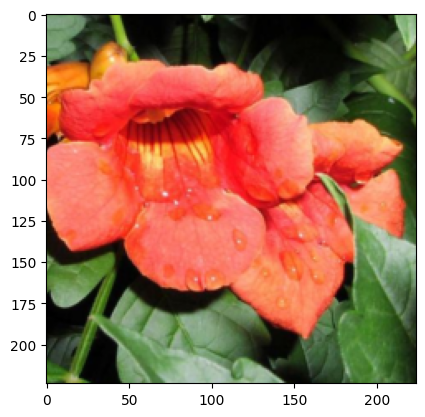

In [40]:
# testing the combination of "imshow" and "process_image" functions
sample_image_2 = test_dir + '/101/image_07949.jpg'
imshow(process_image(sample_image_2))

In [30]:
print(model.class_to_idx)

{'1': 0, '10': 1, '100': 2, '101': 3, '102': 4, '11': 5, '12': 6, '13': 7, '14': 8, '15': 9, '16': 10, '17': 11, '18': 12, '19': 13, '2': 14, '20': 15, '21': 16, '22': 17, '23': 18, '24': 19, '25': 20, '26': 21, '27': 22, '28': 23, '29': 24, '3': 25, '30': 26, '31': 27, '32': 28, '33': 29, '34': 30, '35': 31, '36': 32, '37': 33, '38': 34, '39': 35, '4': 36, '40': 37, '41': 38, '42': 39, '43': 40, '44': 41, '45': 42, '46': 43, '47': 44, '48': 45, '49': 46, '5': 47, '50': 48, '51': 49, '52': 50, '53': 51, '54': 52, '55': 53, '56': 54, '57': 55, '58': 56, '59': 57, '6': 58, '60': 59, '61': 60, '62': 61, '63': 62, '64': 63, '65': 64, '66': 65, '67': 66, '68': 67, '69': 68, '7': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '8': 80, '80': 81, '81': 82, '82': 83, '83': 84, '84': 85, '85': 86, '86': 87, '87': 88, '88': 89, '89': 90, '9': 91, '90': 92, '91': 93, '92': 94, '93': 95, '94': 96, '95': 97, '96': 98, '97': 99, '98': 100, '99'

In [50]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # pre-processing Image
    img=process_image(image_path)
    img=img.float().unsqueeze_(0)

    #moving model to device = "cuda"
    model.to("cuda")

    #moving image to cuda
    img = img.to("cuda")

    #prediction step:
    with torch.no_grad():

      logps=model(img)

    #loading probabilities and indices
    ps = torch.exp(logps)
    top_p, top_idx = ps.topk(topk, dim=1)

    # sending data back to cpu
    probs = top_p.cpu().numpy()[0]

    #maping idx to classes
    idx = top_idx.cpu().numpy()[0]

    idx_to_class = { i:c for c, i in model.class_to_idx.items()}
    classes = [idx_to_class[x] for x in idx]


    return probs , classes





# checking predict function

image_path =test_dir + '/102/image_08004.jpg'
model= model1
topk=5
probs, classes = predict(image_path,model,topk)
print(probs)
print(classes)

[9.9997145e-01 1.7446004e-05 8.3092827e-06 2.1687058e-06 6.2810795e-07]
['102', '84', '78', '79', '18']


In [59]:
#sanity check
# TODO: Display an image along with the top 5 classes

def check(sample_image , model):

  probs, classes = predict(sample_image , model)
  #getting class name from idx
  class_name=[cat_to_name[i] for i in classes]

  #defining matplotlib plot
  fig = plt.figure(figsize= (8,8))
  plot1= plt.subplot2grid((15,9), (0,0) , colspan = 9 ,rowspan=9)
  plot2 = plt.subplot2grid((15,9),(10,2),colspan=5 , rowspan=5)

  #showing image
  image  = Image.open(sample_image)
  plot1.axis("off")
  plot1.set_title("Sample Image")
  plot1.imshow(image)


  #showing the graph of prediction
  plot2.set_yticks(np.arange(5))
  plot2.set_yticklabels(class_name)
  plot2.set_xlabel("probabilities")
  plot2.set_ylabel('Flower names')
  plot2.set_title('Probability Chart')
  plot2.barh(np.arange(5), probs , align = 'center')

  plt.show




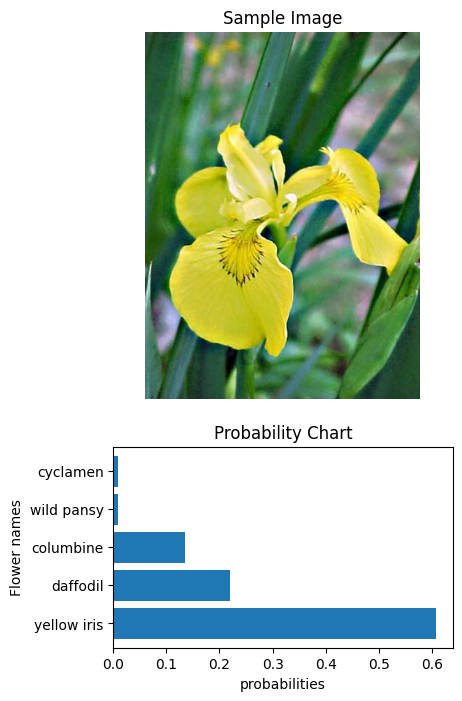

In [61]:
#viewing sanity
sample_image = test_dir + '/15/image_06351.jpg'
model = model1
check(sample_image , model)